<center><h2> Bellabeat </h2></center> 

<center><h4> A high-tech manufacturer of health-focused products for women.</h4></center> 

<center><h2> Mission Statement </h2></center> 

<center><h4> To help analyze smart device data to gain insight into how consumers are using their smart devices and use these
insights discovered to help guide marketing strategy for the company.</h4></center> 


## ASK PHASE

### Key Stakeholders

#### Primary Stakeholders

* Urška Sršen, Bellabeat’s co-founder and Chief Creative Officer
* Sando Mur, Mathematician and Bellabeat’s cofounder

#### Secondary Stakeholders
* Bellabeat marketing analytics team.

### Business Task

**How do users use fitness devices and how can this help Bellabeat's marketing strategy?**

## PREPARE PHASE

### The ROCCC Standard

* A quick look at the data which is gotten from a public dataset shows that it is Reliable, Original, Comprehensive, Current, and Cited (ROCCC).

### Sort and filter the data

* I will focus on the daily activities data for this analysis which shows the total steps, total sleep, and calories in order to identify trends. I also used google sheets to take a quick look at the data before importing in R. The data shows fitness information of 32 Fitbit users with daily activities ranging from a few days to one month for each user.


In [1]:
#Importing libraries
library(reshape2)
library(scales)
library(dplyr)
library(ggplot2)
library(corrplot)
library(tidyr)
library(readr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


corrplot 0.90 loaded


Attaching package: 'tidyr'


The following object is masked from 'package:reshape2':

    smiths



Attaching package: 'readr'


The following object is masked from 'package:scales':

    col_factor




In [2]:
#import the data
dailyActivity_merged <- read_csv("dailyActivity_merged.csv")
dailyCalories_merged <- read_csv("dailyCalories_merged.csv")
dailyIntensities_merged <- read_csv("dailyIntensities_merged.csv")
dailySteps_merged <- read_csv("dailySteps_merged.csv")
sleepDay_merged <- read_csv("sleepDay_merged.csv")
weightLogInfo_merged <- read_csv("weightLogInfo_merged.csv")


Rows: 940 Columns: 15

-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 940 Columns: 3

-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (1): ActivityDay
dbl (2): Id, Calories


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 940 Columns: 10

-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (1): ActivityDay
dbl (9): Id, SedentaryMinutes, LightlyActiv

In [3]:
#I merge the daily activity, calories, steps and sleep data. They all have a similar column 'ID' so we merge by the column.

data1 <- merge(dailyActivity_merged, dailyCalories_merged, by = c("Id","Calories"))
data2 <- merge(dailyIntensities_merged, dailyIntensities_merged, by = c("Id","ActivityDay","SedentaryMinutes", "LightlyActiveMinutes","FairlyActiveMinutes","VeryActiveMinutes", "SedentaryActiveDistance", "LightActiveDistance", "ModeratelyActiveDistance", "VeryActiveDistance"))
data3 <- merge(data1, data2, by = c("Id","ActivityDay","SedentaryMinutes", "LightlyActiveMinutes","FairlyActiveMinutes","VeryActiveMinutes", "SedentaryActiveDistance", "LightActiveDistance", "ModeratelyActiveDistance", "VeryActiveDistance")) %>%
select(-ActivityDay) %>% rename(Date = ActivityDate)

Fitness_daily <- merge(data3, sleepDay_merged, by = "Id",all=TRUE) %>% drop_na() %>% select(-SleepDay, -TrackerDistance)


In [4]:
#We can look at the data
summary(Fitness_daily)

       Id            SedentaryMinutes LightlyActiveMinutes FairlyActiveMinutes
 Min.   :1.504e+09   Min.   :   0.0   Min.   :  0.0        Min.   :  0.00     
 1st Qu.:4.020e+09   1st Qu.: 687.0   1st Qu.:  0.0        1st Qu.:  0.00     
 Median :4.703e+09   Median : 781.0   Median :171.0        Median :  3.00     
 Mean   :5.117e+09   Mean   : 938.6   Mean   :156.4        Mean   : 13.58     
 3rd Qu.:6.962e+09   3rd Qu.:1440.0   3rd Qu.:240.0        3rd Qu.: 19.00     
 Max.   :8.792e+09   Max.   :1440.0   Max.   :518.0        Max.   :143.00     
 VeryActiveMinutes SedentaryActiveDistance LightActiveDistance
 Min.   :  0.00    Min.   :0.0000000       Min.   : 0.000     
 1st Qu.:  0.00    1st Qu.:0.0000000       1st Qu.: 0.000     
 Median :  0.00    Median :0.0000000       Median : 2.860     
 Mean   : 18.76    Mean   :0.0005276       Mean   : 2.771     
 3rd Qu.: 28.00    3rd Qu.:0.0000000       3rd Qu.: 4.480     
 Max.   :210.00    Max.   :0.1100000       Max.   :10.300     
 Moder

In [5]:
#We can also look at the data structure
head(Fitness_daily)
str(Fitness_daily)

,Id,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,Calories,Date,TotalSteps,TotalDistance,LoggedActivitiesDistance,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,754,289,6,24,0,5.81,0.25,1.97,1896,5/6/2016,12159,8.03,0,1,327,346
2,1503960366,754,289,6,24,0,5.81,0.25,1.97,1896,5/6/2016,12159,8.03,0,2,384,407
3,1503960366,754,289,6,24,0,5.81,0.25,1.97,1896,5/6/2016,12159,8.03,0,1,412,442
4,1503960366,754,289,6,24,0,5.81,0.25,1.97,1896,5/6/2016,12159,8.03,0,2,340,367
5,1503960366,754,289,6,24,0,5.81,0.25,1.97,1896,5/6/2016,12159,8.03,0,1,700,712
6,1503960366,754,289,6,24,0,5.81,0.25,1.97,1896,5/6/2016,12159,8.03,0,1,304,320


'data.frame':	15901 obs. of  17 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SedentaryMinutes        : num  754 754 754 754 754 754 754 754 754 754 ...
 $ LightlyActiveMinutes    : num  289 289 289 289 289 289 289 289 289 289 ...
 $ FairlyActiveMinutes     : num  6 6 6 6 6 6 6 6 6 6 ...
 $ VeryActiveMinutes       : num  24 24 24 24 24 24 24 24 24 24 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ LightActiveDistance     : num  5.81 5.81 5.81 5.81 5.81 ...
 $ ModeratelyActiveDistance: num  0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 ...
 $ VeryActiveDistance      : num  1.97 1.97 1.97 1.97 1.97 ...
 $ Calories                : num  1896 1896 1896 1896 1896 ...
 $ Date                    : chr  "5/6/2016" "5/6/2016" "5/6/2016" "5/6/2016" ...
 $ TotalSteps              : num  12159 12159 12159 12159 12159 ...
 $ TotalDistance           : num  8.03 8.03 8.03 8.03 8.03 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0

## PROCESS PHASE

### Cleaning the data for analysis

* For this case study, I need the important information that shows the most activity log for the data, and the columns that don't show this will be removed.

In [6]:
#In order to better visualize the data I will select the important columns and store in a new data frame if in case I need to refer to the old dataframe. In this case I need to analyze the steps
 
ActualFitness_daily <- Fitness_daily %>%
  select(-c(SedentaryActiveDistance, LightActiveDistance, ModeratelyActiveDistance, VeryActiveDistance, TotalSleepRecords, TotalTimeInBed)) %>%
  group_by(Id, Calories, Date) %>% 
  summarise_all(mean, na.rm=T)%>%
drop_na()

In [7]:
#I check the data to be sure I filtered out the columns I don't need
head(ActualFitness_daily)

Id,Calories,Date,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,TotalSteps,TotalDistance,LoggedActivitiesDistance,TotalMinutesAsleep
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,0,5/12/2016,1440,0,0,0,0,0.00,0,360.28
1503960366,1728,4/17/2016,539,164,20,38,9705,6.48,0,360.28
1503960366,1740,5/8/2016,574,203,8,44,10060,6.58,0,360.28
1503960366,1745,4/15/2016,726,209,34,29,9762,6.28,0,360.28
1503960366,1775,4/21/2016,838,211,8,19,9819,6.34,0,360.28
1503960366,1776,4/14/2016,1218,181,11,30,10460,6.74,0,360.28


In [8]:
#I will make a class to show the sedentary to active users and keep the fitness daily data frame in case I need to refer back to it or I encounter an error in the code in order to avoid losing the file and starting from the beginning.

ActualFitness_data <- ActualFitness_daily %>%
group_by(Id) %>%
summarise(
user_type = factor(case_when(
    SedentaryMinutes > mean(SedentaryMinutes) & LightlyActiveMinutes < mean(LightlyActiveMinutes) & FairlyActiveMinutes < mean(FairlyActiveMinutes) & VeryActiveMinutes < mean(VeryActiveMinutes) ~ "Sedentary",
    SedentaryMinutes < mean(SedentaryMinutes) & LightlyActiveMinutes > mean(LightlyActiveMinutes) & FairlyActiveMinutes < mean(FairlyActiveMinutes) & VeryActiveMinutes < mean(VeryActiveMinutes) ~ "Lightly Active",
    SedentaryMinutes < mean(SedentaryMinutes) & LightlyActiveMinutes < mean(LightlyActiveMinutes) & FairlyActiveMinutes > mean(FairlyActiveMinutes) & VeryActiveMinutes < mean(VeryActiveMinutes) ~ "Fairly Active",
    SedentaryMinutes < mean(SedentaryMinutes) & LightlyActiveMinutes < mean(LightlyActiveMinutes) & FairlyActiveMinutes < mean(FairlyActiveMinutes) & VeryActiveMinutes > mean(VeryActiveMinutes) ~ "Very Active",
),levels=c("Sedentary", "Lightly Active", "Fairly Active", "Very Active")), Calories, Date, TotalSteps, TotalDistance, TotalMinutesAsleep, .group=Id) %>%
drop_na()
    head(ActualFitness_data)

`summarise()` has grouped output by 'Id'. You can override using the `.groups` argument.



Id,user_type,Calories,Date,TotalSteps,TotalDistance,TotalMinutesAsleep,.group
<dbl>,<fct>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,Sedentary,0,5/12/2016,0,0.00,360.28,1503960366
1503960366,Fairly Active,1728,4/17/2016,9705,6.48,360.28,1503960366
1503960366,Very Active,1740,5/8/2016,10060,6.58,360.28,1503960366
1503960366,Fairly Active,1745,4/15/2016,9762,6.28,360.28,1503960366
1503960366,Sedentary,1776,4/14/2016,10460,6.74,360.28,1503960366
1503960366,Very Active,1819,5/9/2016,12022,7.72,360.28,1503960366


In [9]:
#The data shows that the date column is a factor so I will convert it to a character

ActualFitness_data %>% mutate_if(is.factor, as.character) -> ActualFitness_data

`mutate_if()` ignored the following grouping variables:
Column `Id`



In [10]:
#I noticed that the date in the data is following the dd/mm/yyyy format so I convert the dates to days of the week so that I can better interprete my data. For this I need to load some packages.
library(lubridate)
ActualFitness_data$FormatDate <- mdy(ActualFitness_data$Date)
ActualFitness_data$Weekdays <- weekdays(as.Date(ActualFitness_data$FormatDate,'%d-%m-%Y'))
head(ActualFitness_data)


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




Id,user_type,Calories,Date,TotalSteps,TotalDistance,TotalMinutesAsleep,.group,FormatDate,Weekdays
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<chr>
1503960366,Sedentary,0,5/12/2016,0,0.00,360.28,1503960366,2016-05-12,Thursday
1503960366,Fairly Active,1728,4/17/2016,9705,6.48,360.28,1503960366,2016-04-17,Sunday
1503960366,Very Active,1740,5/8/2016,10060,6.58,360.28,1503960366,2016-05-08,Sunday
1503960366,Fairly Active,1745,4/15/2016,9762,6.28,360.28,1503960366,2016-04-15,Friday
1503960366,Sedentary,1776,4/14/2016,10460,6.74,360.28,1503960366,2016-04-14,Thursday
1503960366,Very Active,1819,5/9/2016,12022,7.72,360.28,1503960366,2016-05-09,Monday


In [11]:
#Now that the dates have been converted to days of the week, I convert the sleep time to hours.
ActualFitness_data <- ActualFitness_data %>%
mutate(TotalHoursAsleep = TotalMinutesAsleep / 60)

head(ActualFitness_data)

Id,user_type,Calories,Date,TotalSteps,TotalDistance,TotalMinutesAsleep,.group,FormatDate,Weekdays,TotalHoursAsleep
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<chr>,<dbl>
1503960366,Sedentary,0,5/12/2016,0,0.00,360.28,1503960366,2016-05-12,Thursday,6.004667
1503960366,Fairly Active,1728,4/17/2016,9705,6.48,360.28,1503960366,2016-04-17,Sunday,6.004667
1503960366,Very Active,1740,5/8/2016,10060,6.58,360.28,1503960366,2016-05-08,Sunday,6.004667
1503960366,Fairly Active,1745,4/15/2016,9762,6.28,360.28,1503960366,2016-04-15,Friday,6.004667
1503960366,Sedentary,1776,4/14/2016,10460,6.74,360.28,1503960366,2016-04-14,Thursday,6.004667
1503960366,Very Active,1819,5/9/2016,12022,7.72,360.28,1503960366,2016-05-09,Monday,6.004667


## ANALYZE PHASE

* Now I have the columns for the analysis, I can make some plots that can show possible trends and answer the questions.

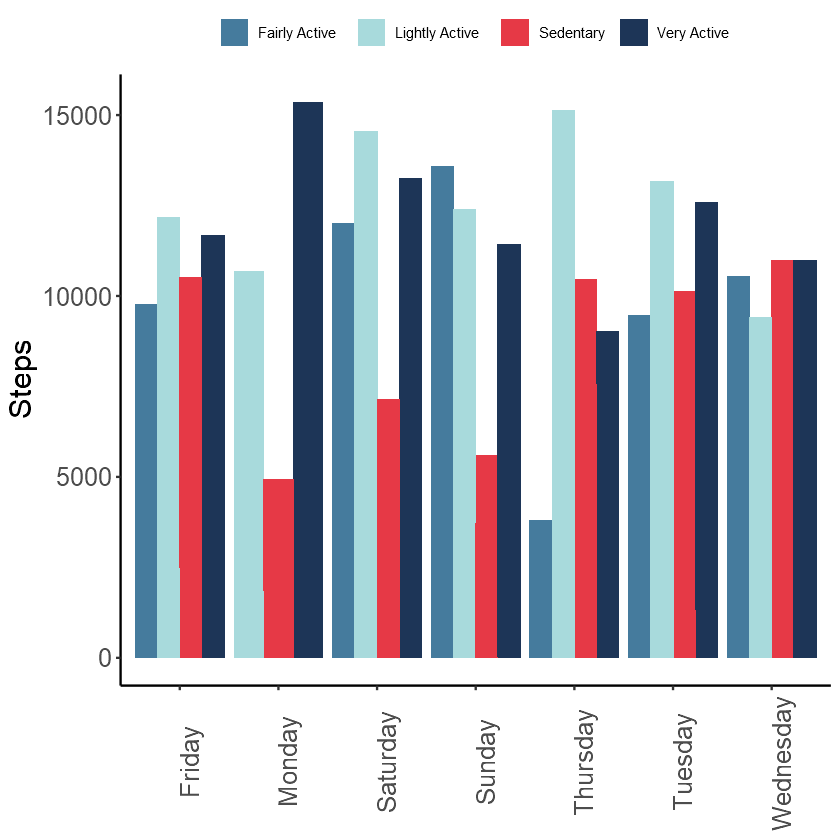

In [12]:
#Let us compare Total steps against Weekdays using a bar plot
 ggplot(ActualFitness_data, aes(x= Weekdays, y = TotalSteps, fill=user_type))+
scale_fill_manual(values = c('#457b9d', '#a8dadc', '#e63946','#1d3557'))+
  geom_bar(stat = "identity", position = position_dodge(.9), width = 0.9)+theme_classic()+
xlab(NULL)+ylab("Steps")+theme(axis.text.y = element_text(size = 15), 
        axis.text.x = element_text(size = 15, angle=90), axis.title.y = element_text(size = 18))+theme(legend.title = element_blank(), legend.position = "top")

### Total Steps:

* From the data, we are able to visualize the steps the users cover from sedentary to very active users. The bar plot shows that Monday had the lowest sedentary users and Friday had the highest, Wednesday had the lowest lightly active users and Thursday had the highest, Thursday had the lowest fairly active users and Sunday had the highest, Thursday had the lowest very active users and Monday had the highest.

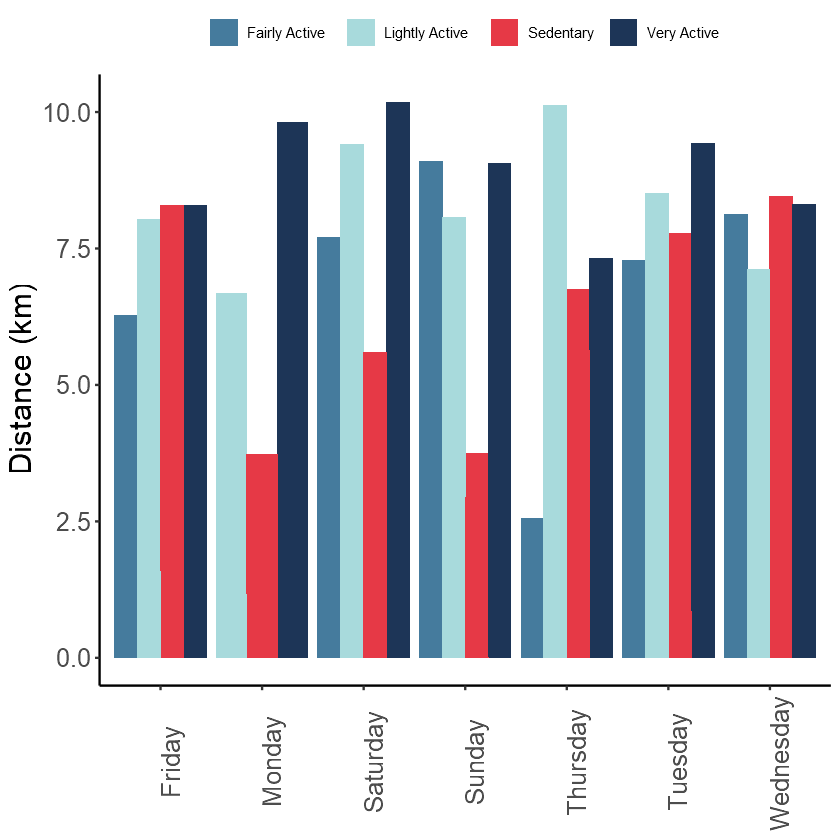

In [13]:
#Comparing Total Distance
ggplot(ActualFitness_data, aes(x= Weekdays, y = TotalDistance, fill=user_type))+
scale_fill_manual(values = c('#457b9d', '#a8dadc', '#e63946','#1d3557'))+
  geom_bar(stat = "identity", position = position_dodge(.9), width = 0.9)+theme_classic()+
xlab(NULL)+ylab("Distance (km)")+theme(axis.text.y = element_text(size = 15), 
        axis.text.x = element_text(size = 15, angle=90), axis.title.y = element_text(size = 18))+theme(legend.title = element_blank(), legend.position = "top")


### Total Distance
* The total distance plot is closely related with the total steps plot so we don't need the variable.

* We can also run other analysis to see if we can connect how the user data reflects on variables like sleep and calories.

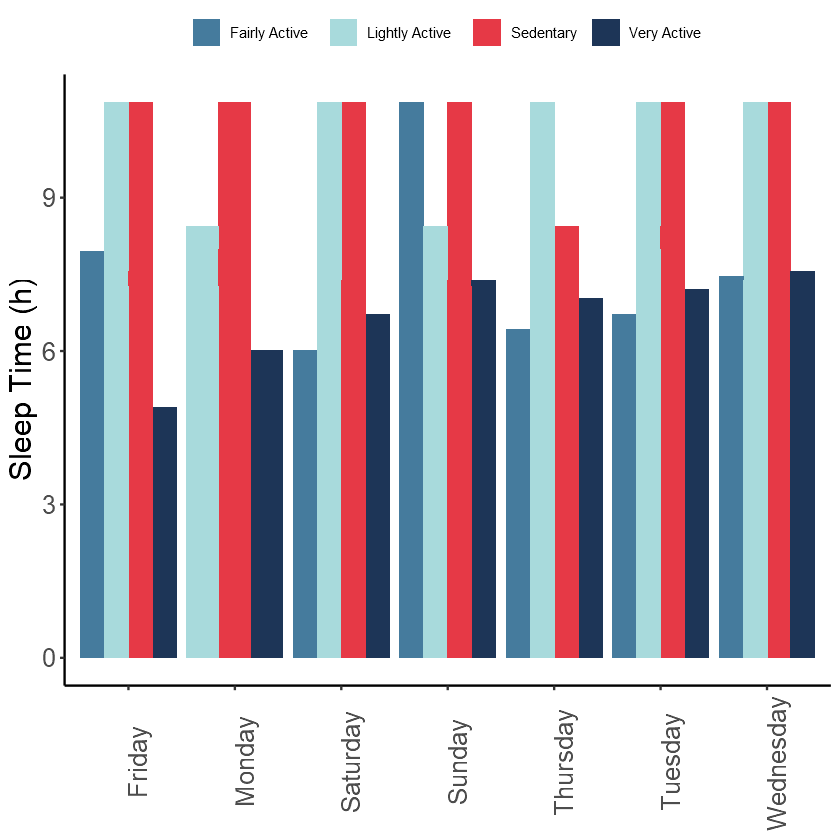

In [14]:
#Let us take a look at the sleep quality of the users over the week with a barplot
ggplot(ActualFitness_data, aes(x= Weekdays, y = TotalHoursAsleep, fill=user_type))+
scale_fill_manual(values = c('#457b9d', '#a8dadc', '#e63946','#1d3557'))+
  geom_bar(stat = "identity", position = position_dodge(.9), width = 0.9)+theme_classic()+
xlab(NULL)+ylab("Sleep Time (h)")+theme(axis.text.y = element_text(size = 15), 
        axis.text.x = element_text(size = 15, angle=90), axis.title.y = element_text(size = 18))+theme(legend.title = element_blank(), legend.position = "top")

## Sleep Time

* The plot shows that sedentary, lightly, and fairly active users have a sleep time that fluctuates at 8-10h (hours) Monday-Sunday, while very active users have a sleep time of 5-7h.


* Let us also compare using boxplots

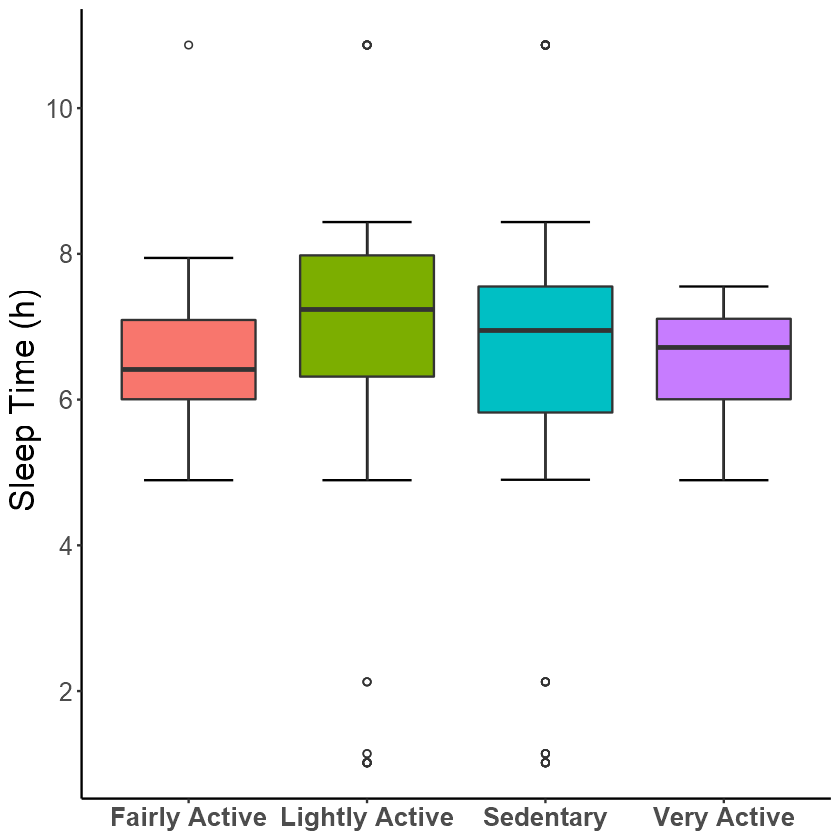

In [15]:
#using boxplot
ggplot(ActualFitness_data, aes(user_type, TotalHoursAsleep, fill=user_type))+scale_y_continuous(breaks = c(2,4,6,8,10))+
  stat_boxplot(aes(user_type, TotalHoursAsleep), 
                geom='errorbar', linetype=1, width=0.5)+  #whiskers
  geom_boxplot( aes(user_type, TotalHoursAsleep),outlier.shape=1)+theme_classic()+xlab(NULL)+ylab("Sleep Time (h)")+
  theme(legend.text = element_blank(), legend.title = element_blank(),
        legend.key = element_blank(), legend.position = "none", axis.text.y = element_text(size = 15), 
        axis.text.x = element_text(size = 15, face = "bold"), axis.title.y = element_text(size = 20))

### Sleep Data with Boxplot

* The boxplot represents the sleep data better. We can see some obvious outliers for the sedentary, lightly, and fairly active users which could represent useful information when we need to refer back to the data. The sedentary and lightly active users have a minimum sleep time of 5h and a maximum sleep time of 8.5h. The fairly active users have a minimum sleep time of 5h and maximum sleep time of 8h and the very active users have a minimum sleep time of 5h and a maximum sleep time of 7h

`geom_smooth()` using formula 'y ~ x'



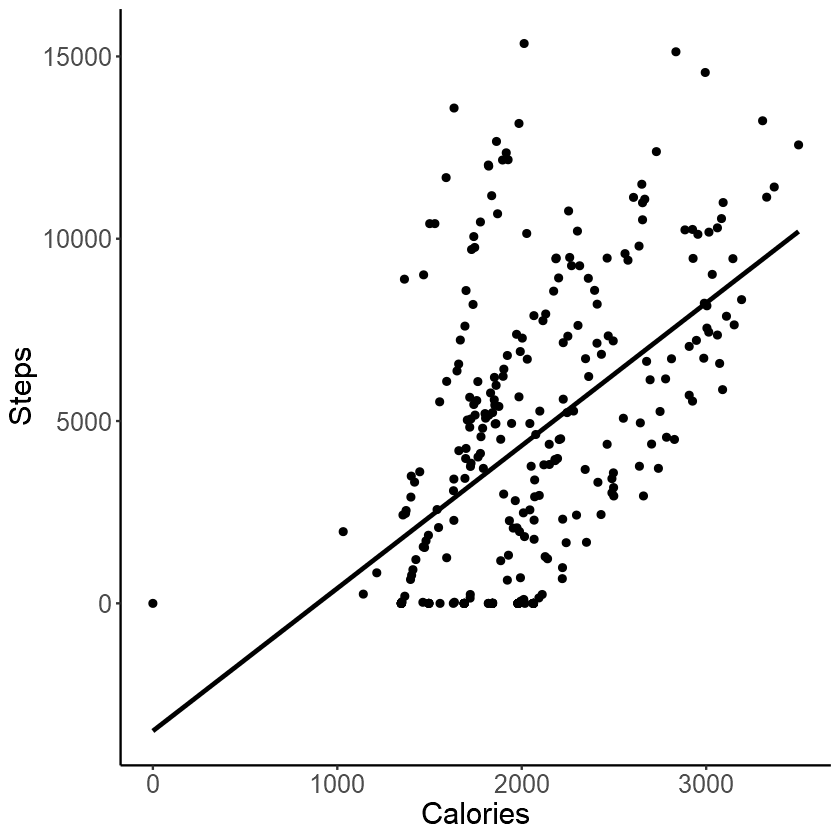

In [16]:
#lets's make it fun by using a scatterplot to compare steps with calories
ggplot(ActualFitness_data, aes(x = Calories, y= TotalSteps))+geom_point()+
  geom_smooth(method = "lm", se = F, color="black")+
  theme_classic()+xlab("Calories")+ylab("Steps")+theme(axis.text.y = element_text(size = 15), 
        axis.text.x = element_text(size = 15), axis.title.x = element_text(size = 18), axis.title.y = element_text(size = 18))

## Comparing Steps and Calories

* Here we can see a postive linear regression which shows that the higher the steps, the higher the number of calories burned.

* We can also use a boxplot to compare calories burned by the users.

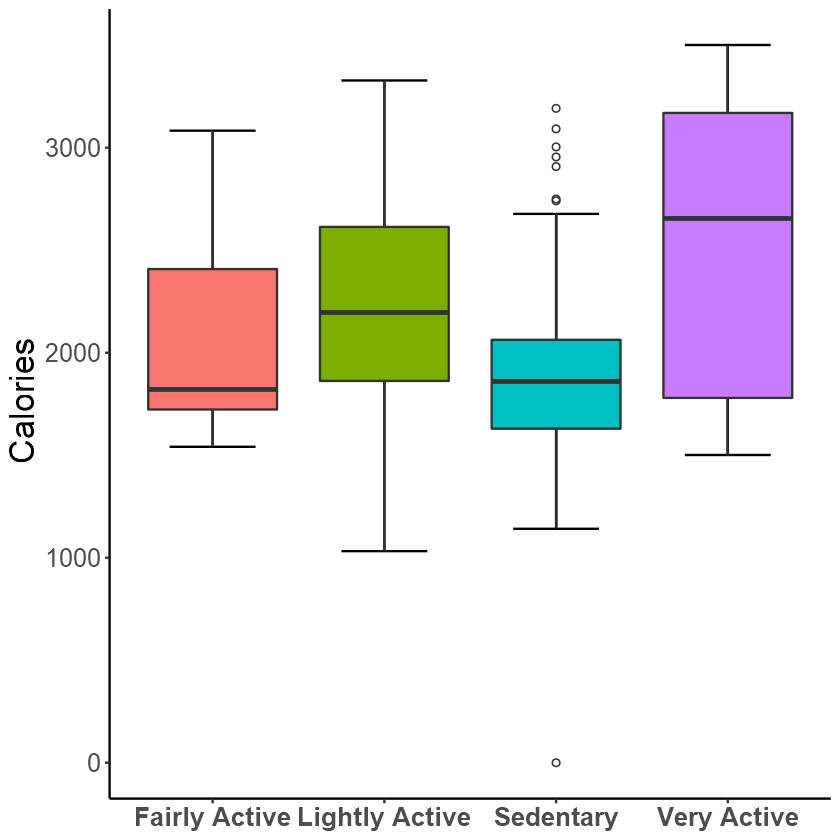

In [17]:
ggplot(ActualFitness_data, aes(user_type, Calories, fill=user_type))+
  stat_boxplot(aes(user_type, Calories), 
                geom='errorbar', linetype=1, width=0.5)+  #whiskers
  geom_boxplot( aes(user_type, Calories),outlier.shape=1)+theme_classic()+xlab(NULL)+ylab("Calories")+
  theme(legend.text = element_blank(), legend.title = element_blank(),
        legend.key = element_blank(), legend.position = "none", axis.text.y = element_text(size = 15), 
        axis.text.x = element_text(size = 15, face = "bold"), axis.title.y = element_text(size = 20))

* Here we see that the very active users have the highest amount of calories burned while the sedentary users had the lowest. Let us also compare calories and sleep to see if we can find any connection using a scatterplot.

`geom_smooth()` using formula 'y ~ x'



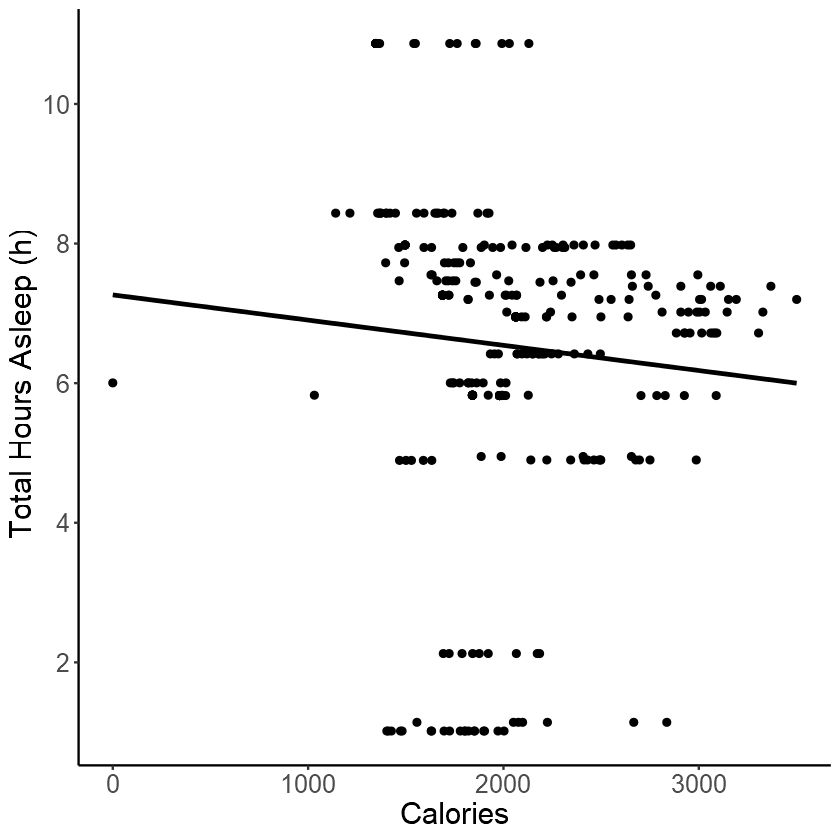

In [18]:
ggplot(ActualFitness_data, aes(x = Calories, y= TotalHoursAsleep))+geom_point()+scale_y_continuous(breaks = c(2,4,6,8,10))+
  geom_smooth(method = "lm", se = F, color="black")+
  theme_classic()+xlab("Calories")+ylab("Total Hours Asleep (h)")+theme(axis.text.y = element_text(size = 15), 
        axis.text.x = element_text(size = 15), axis.title.x = element_text(size = 18), axis.title.y = element_text(size = 18))

* Here we see a negative regression which show that as sleep time decreases, calories increases.

## Users Data

* Now that we have noticed some trends in the data using the user_type variable, we can actual use a pie chart to represent the number of times the users are sedentary, lightly active, fairly active and very active category.

In [19]:
#first I create a new table
ActualFitness_pie <- ActualFitness_data %>%
  group_by(user_type) %>%
  summarize(count = n())

head(ActualFitness_pie)


user_type,count
<chr>,<int>
Fairly Active,11
Lightly Active,116
Sedentary,163
Very Active,11


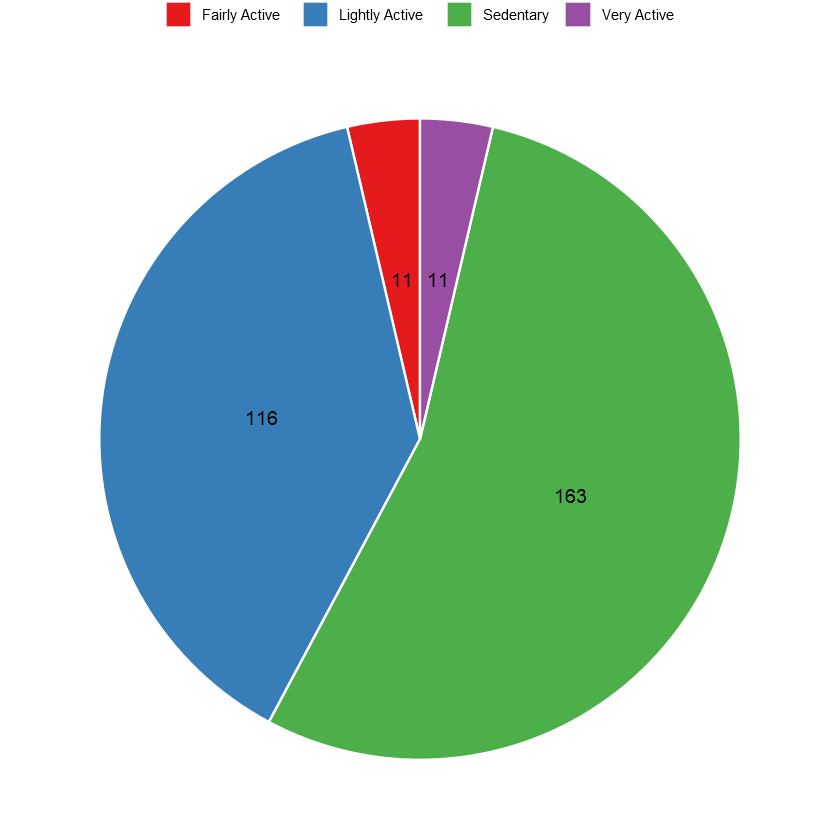

In [20]:
#then I make the plot
ggplot(ActualFitness_pie, aes(x="", y=count, fill=user_type)) +
  geom_bar(stat="identity", width=1, color="white") +
  coord_polar("y", start=0) +
  theme_void()+theme(legend.title = element_blank(), legend.position = "top")+
  scale_fill_brewer(palette="Set1")+geom_text(aes(label = paste(count)), 
               position = position_stack(vjust = .5))

* We can see that the highest value is Sedentary (163), followed by lightly active (116) and fairly active (11) and very active (11). This shows that the users are mostly sedentary.

## SHARE PHASE
​
​
**Conclusions:**
​
* I found some interesting insights in this data that I think can be used to target new customers
​
    **1)** I see a clear relationship on how users are sedentary, lightly active, fairly active, and very active throughout the week using the daily steps data.
    
    **2)** I also see a relationship with the sleep quality of the sedentary, lightly active, fairly active, and very active weekly. This sleep data was further checked and the users and the very active users maintained the best sleep time. Comparing the calories burned with the total steps and also the sleep time showed that the very active users burned calories faster and slept better.
    
* With the data generated, the company can move forward to marketing messages that target how very active users can improve sleep and stress conditions by using the fitness device to track their sleep patterns and daily activities in order to have a better quality of life.

## Thanks for reading!